<h1><center>Drug Consumption Analysis & Predictions</center></h1>


In [0]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [0]:
#load the csv file in a dataframe using read_csv function
df = pd.read_csv('../input/drug-consumptionwith-titles/drug_consumption.csv',encoding="latin-1")
copy_df = df.copy()        #make a copy of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [0]:
#print first 5 rows of the dataset
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [0]:
#
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [0]:
#check if any column or row contain a null value
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

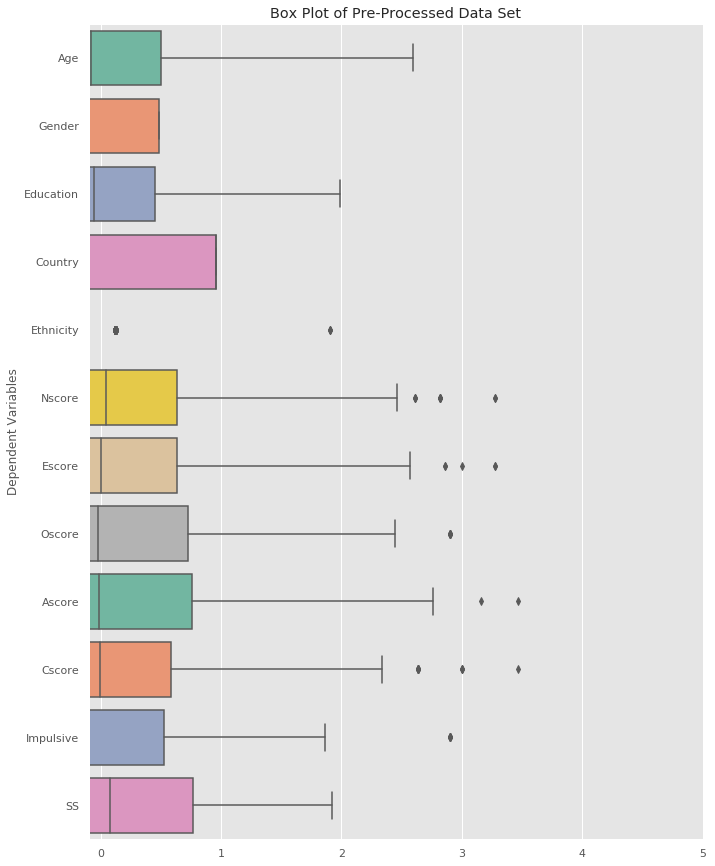

In [0]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-.100, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], 
  orient = 'h', 
  palette = 'Set2')


In [0]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

In [0]:
# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [0]:
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [0]:
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [0]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'

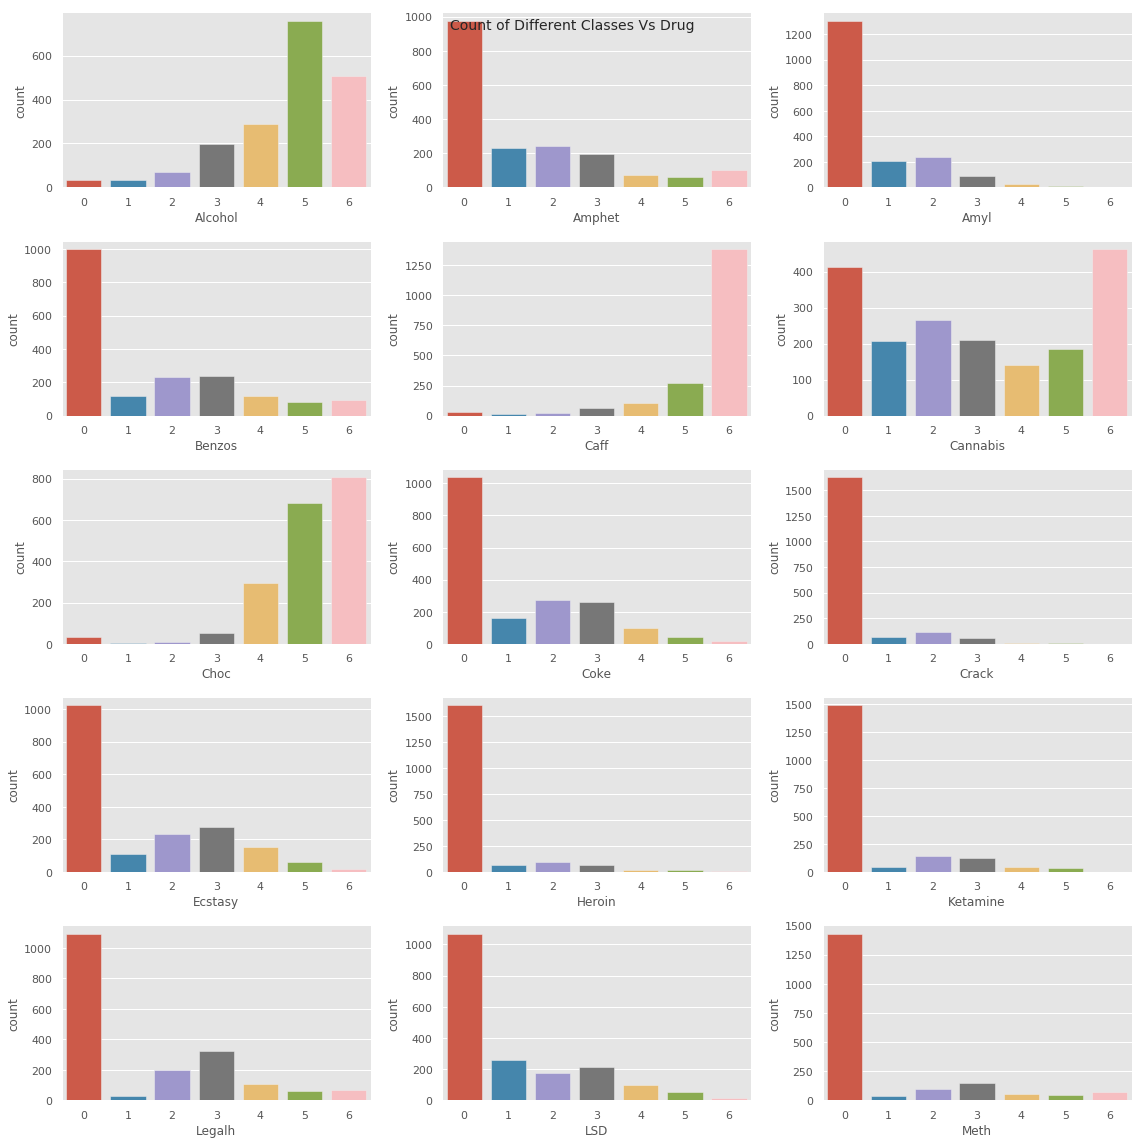

In [0]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

In [0]:
count_of_users = []
count_of_non_users = []

In [0]:
for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [0]:
trace1 = go.Bar(
    x=columns,
    y=count_of_users,
    name='User',
    marker = dict(color="rgb(117, 127, 221)")
)
trace2 = go.Bar(
    x=columns,
    y=count_of_non_users,
    name='Non-User',
    marker = dict(color="rgb(191, 221, 229)")
)


data = [trace1, trace2]
layout = go.Layout(
    title= 'Drug Vs User Or Non-user',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


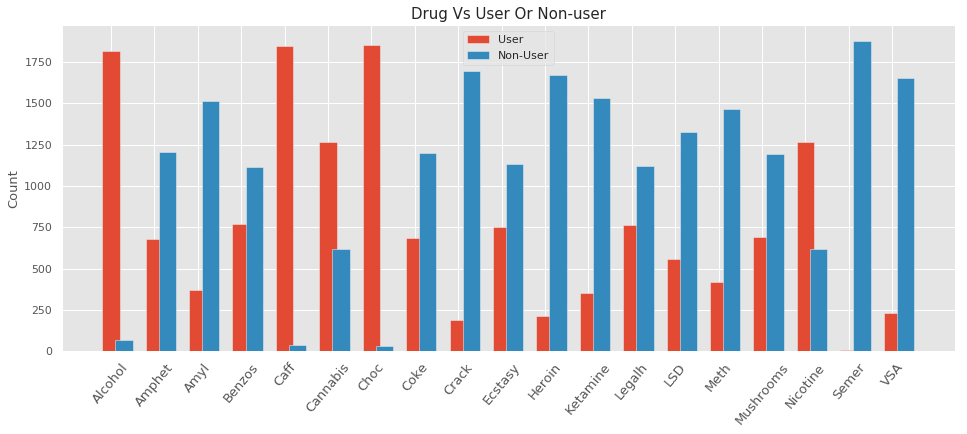

In [0]:
bins = np.arange(1,20,1)
plt.figure(figsize=(16,6))
plt.bar(bins+0,count_of_users,width=0.4,label ='User')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User')
plt.xticks(bins,columns,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=15)
plt.legend()

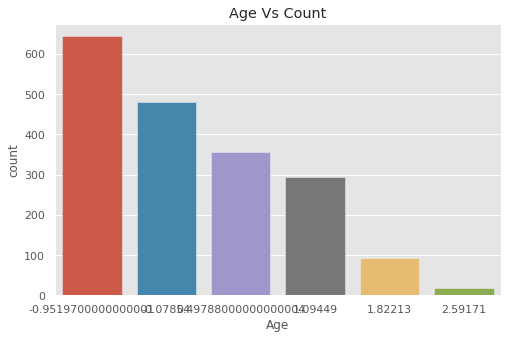

In [0]:
ax = sns.countplot(x='Age', data=df)
plt.title('Age Vs Count')
ax.figure.set_size_inches(8, 5)

In [0]:
for column in copy_df.columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [0]:
#####------------------------------------------------------------------------#######################
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [0]:
copy_df['Count'] = pd.Series()
copy_df['Count'] = copy_df['Count'].fillna(value = 0.0)
for i in cp:
    copy_df['Count']+=copy_df[i]

In [0]:
pk = copy_df['Count'].value_counts()

In [0]:
col = [i for i in range(len(pk.values))]
data = [
go.Bar(
    x = list(pk.index),
    y = list(pk.values),
    marker=dict(color=col, colorscale='Jet', showscale=False)
),]
layout= go.Layout(
    title= 'Used Drugs Vs Number of Users',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    xaxis=dict(title='Drug Count', ticklen=5, gridwidth=2),
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Drug-Count')

In [0]:
df['Country'].value_counts()
con = ['UK','USA','Canada','Australia','Ireland','New Zealand']

In [0]:
data = [dict(
        type='choropleth',
        locations = con,
        locationmode='country names',
        z=(df['Country'].value_counts().values),
        text=con,
        colorscale='portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Drug Addicted in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')

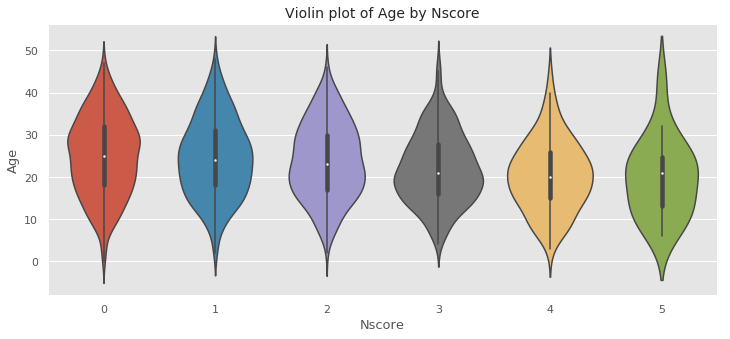

In [0]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Nscore', data=df)
plt.title('Violin plot of Age by Nscore',fontsize=14)
plt.xlabel('Nscore',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

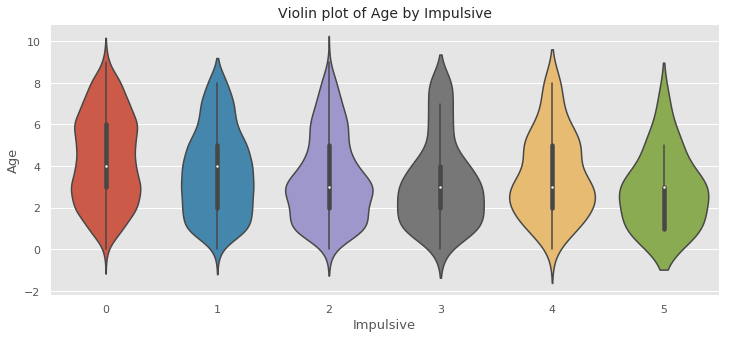

In [0]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Impulsive', data=df)
plt.title('Violin plot of Age by Impulsive',fontsize=14)
plt.xlabel('Impulsive',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

In [0]:
corrmat = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

In [0]:
yp = []
for i in df['Benzos']:
    if(i==0):
        yp.append([1,0,0,0,0,0,0])
    elif(i==1):
        yp.append([0,1,0,0,0,0,0])
    elif(i==2):
        yp.append([0,0,1,0,0,0,0])
    elif(i==3):
        yp.append([0,0,0,1,0,0,0])
    elif(i==4):
        yp.append([0,0,0,0,1,0,0])
    elif(i==5):
        yp.append([0,0,0,0,0,1,0])
    elif(i==6):
        yp.append([0,0,0,0,0,0,1])
yp = np.array(yp)

In [0]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, yp, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

In [0]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
#rectified linear unit
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=12))
#classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=7, init='uniform', activation='sigmoid'))

In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
classifier.fit(X_train, y_train, validation_split = 0.20, batch_size=100, epochs=70,verbose=1)

In [0]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
y_pred

In [0]:
for i in range(len(y_pred)):
    maxs = max(y_pred[i])
    print(maxs)
    y_pred[i] = (y_pred[i]==maxs)

### SVM for Multiclass Classification 

In [0]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=2,random_state=0)
svm.fit(X_train1, y_train1.ravel())

In [0]:
pred = svm.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)
accu

### SVM For Binary Classfication

In [0]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['User_Benzos']

X = copy_df[feature_col_names].values
y = copy_df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from sklearn.metrics import roc_curve,auc

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [0]:
svm = SVC(kernel="linear", C=1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
pred = svm.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)

### K-Neighbour Classifier:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

In [0]:
report_performance(clf)
roc_curves(clf)

### K-Neighbour Classifier for Multiclass:

In [0]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
clf = KNeighborsClassifier()
clf.fit(X_train1,y_train1)

In [0]:
pred = clf.predict(X_test1)
#print(pred)
accu = metrics.accuracy_score(y_test1,pred)
print("Accuracy=",accu)